In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [2]:
df = pd.read_csv('facebook_ads.csv')

In [3]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
print(df.isnull().sum())

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64


# There is a preference for the category 30-34

<BarContainer object of 4 artists>

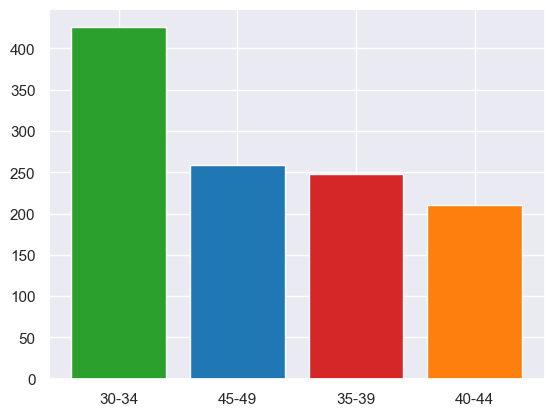

In [6]:
color = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']
plt.bar(df['age'].value_counts().index,df['age'].value_counts().values,color=color)

# Genders are almost equal with a slight bigger ammount of males.

<BarContainer object of 2 artists>

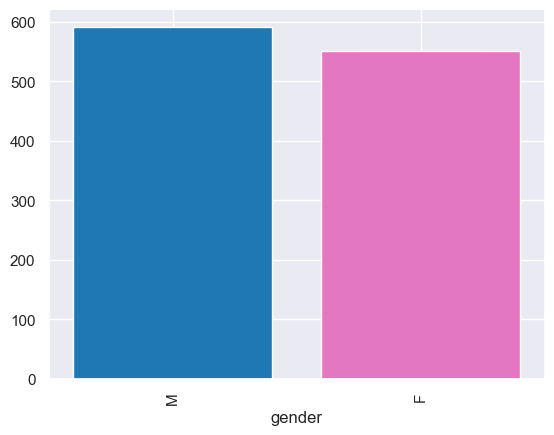

In [7]:
color = ['tab:blue', 'tab:pink']
df['gender'].value_counts().plot(kind='bar')
plt.bar(df['gender'].value_counts().index,df['gender'].value_counts().values,color=color)

# Number Of Clicks

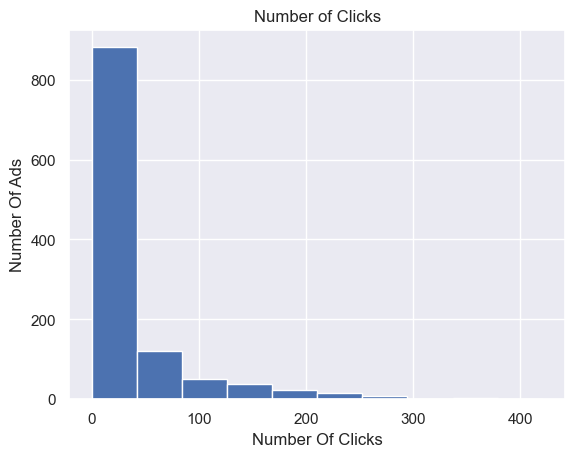

In [8]:
plt.hist(df['Clicks'])
plt.xlabel('Number Of Clicks')
plt.ylabel('Number Of Ads')
plt.title('Number of Clicks')
plt.show()

# Money Spent

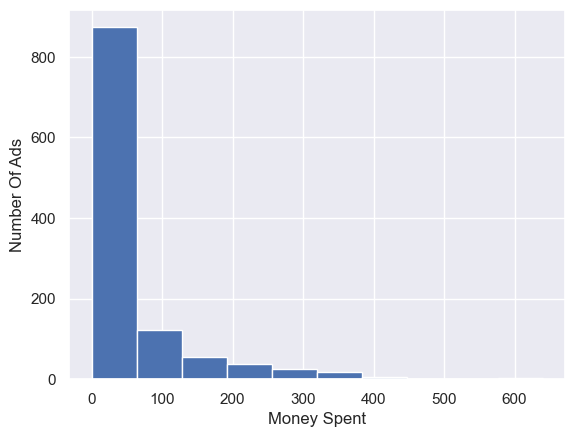

In [9]:
plt.hist(df['Spent'])
plt.xlabel('Money Spent')
plt.ylabel('Number Of Ads')
plt.show()

# Number of Clicks by Money Spent

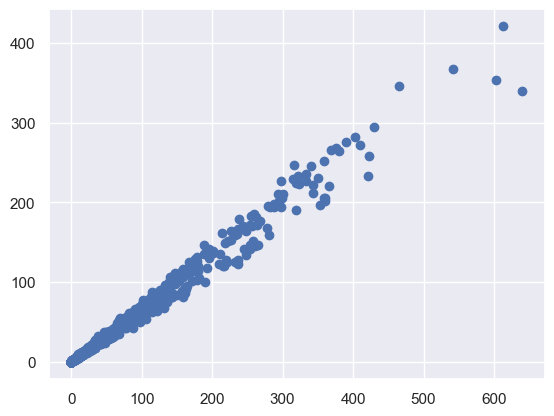

In [10]:
plt.scatter(df['Spent'],df['Clicks'])

In [11]:
numirical_colums = df.select_dtypes(include=['float64','int64']).columns
numirical_colums=numirical_colums.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id'])

In [12]:
numirical_colums

Index(['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [13]:
corrolation=df[numirical_colums].corr()
corrolation

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
interest,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


In [14]:
corrolation['Impressions']

interest               0.101973
Impressions            1.000000
Clicks                 0.948514
Spent                  0.970386
Total_Conversion       0.812838
Approved_Conversion    0.684249
Name: Impressions, dtype: float64

In [15]:
corrolation['Impressions'].sort_values(ascending=False)

Impressions            1.000000
Spent                  0.970386
Clicks                 0.948514
Total_Conversion       0.812838
Approved_Conversion    0.684249
interest               0.101973
Name: Impressions, dtype: float64

D:\ProgramFiles\Applications\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


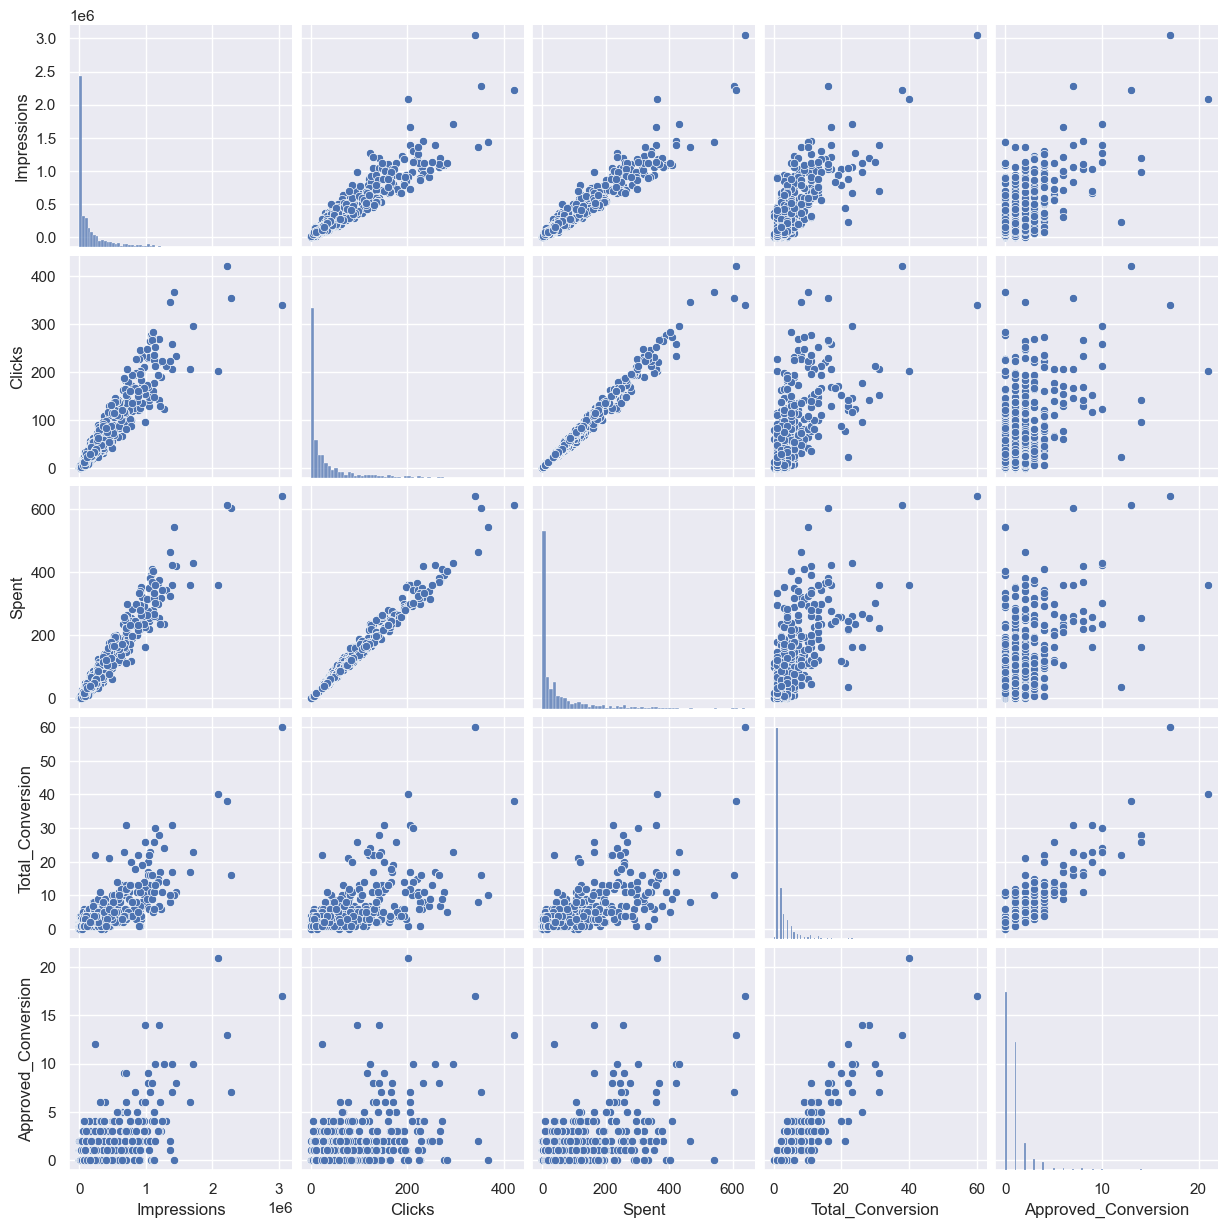

In [16]:
sns.pairplot(data=df[numirical_colums.drop('interest')])
plt.show()

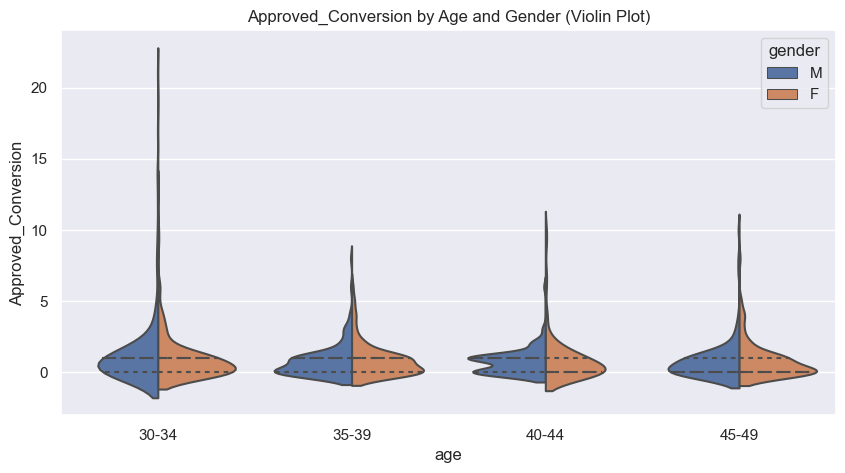

In [17]:
# Violin Plot for age
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='age', y='Approved_Conversion', hue='gender', split=True, inner='quartiles')
plt.title('Approved_Conversion by Age and Gender (Violin Plot)')
plt.show()

Index(['Approved_Conversion', 'Total_Conversion', 'Impressions', 'Spent',
       'Clicks', 'interest'],
      dtype='object')


<Axes: >

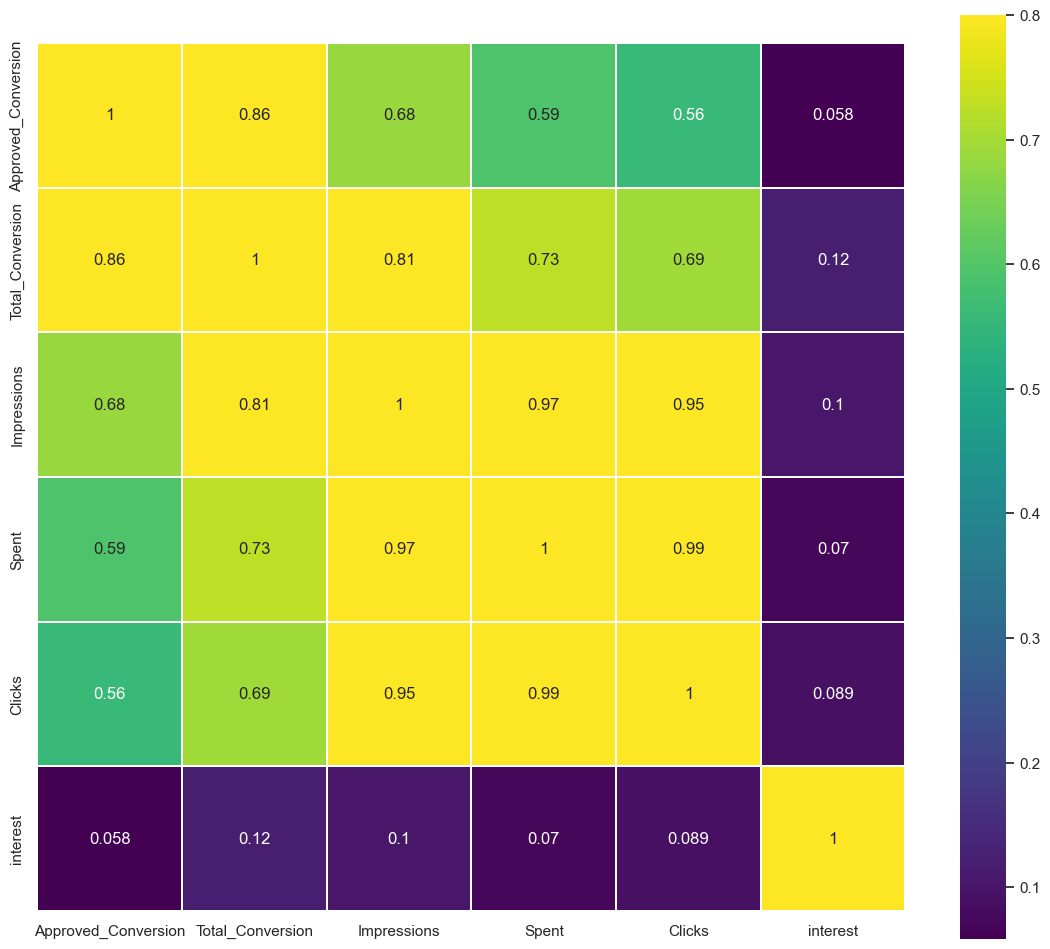

In [18]:
k=6
cols = corrolation.nlargest(k,'Approved_Conversion')['Approved_Conversion'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=0.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},
            yticklabels=cols.values)

In [19]:
new_df = df[numirical_colums]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [21]:
x=new_df.drop(['Approved_Conversion','interest'],axis=1)
y=new_df['Approved_Conversion']

In [22]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

# Model Train

In [24]:
model = RandomForestRegressor()

In [25]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
model.score(x_test,y_test)

0.6418128281405384

In [27]:
predict = model.predict(x_test)

In [28]:
y_test

310     0
450     1
1047    0
467     1
895     1
       ..
731     0
1032    8
243     0
907     3
599     1
Name: Approved_Conversion, Length: 229, dtype: int64

In [29]:
predict

array([4.30000000e-01, 1.00000000e-01, 4.80000000e-01, 2.30000000e-01,
       5.70000000e-01, 7.93000000e+00, 8.00000000e-02, 8.30000000e-01,
       4.00000000e-01, 2.55000000e+00, 3.40000000e-01, 1.80000000e-01,
       4.91000000e+00, 6.60000000e-01, 6.30000000e-01, 0.00000000e+00,
       9.00000000e-01, 6.40000000e-01, 1.02000000e+00, 1.23000000e+00,
       1.40000000e-01, 3.05000000e+00, 6.96666667e-01, 1.23500000e+01,
       7.50000000e-01, 4.70000000e-01, 6.00000000e-02, 8.40000000e-01,
       1.20000000e+00, 0.00000000e+00, 8.00000000e-02, 1.26000000e+00,
       6.90000000e-01, 5.70000000e-01, 1.11000000e+00, 8.60000000e-01,
       1.95000000e+00, 1.00000000e-01, 2.70000000e-01, 1.60000000e-01,
       2.00000000e+00, 6.30000000e-01, 2.08000000e+00, 5.90000000e-01,
       1.40000000e-01, 1.40000000e-01, 1.70000000e-01, 6.40000000e-01,
       4.60000000e-01, 1.44000000e+00, 7.10000000e-01, 2.70000000e-01,
       2.70000000e-01, 7.20000000e-01, 9.40000000e-01, 3.40000000e-01,
      

# Save Model

In [30]:
import joblib

In [31]:
joblib.dump(model,'model.joblib')

['model.joblib']

# Load Model

In [32]:
model = joblib.load('model.joblib')